In [1]:
import pandas as pd

In [2]:
actors = pd.read_csv("data/actors_meta.csv")
emotions = pd.read_csv("data/raw/emotions.csv")

In [3]:
actors

,ActorID,Age,Sex,Race,Ethnicity
0,1001,51,Male,Caucasian,Not Hispanic
1,1002,21,Female,Caucasian,Not Hispanic
2,1003,21,Female,Caucasian,Not Hispanic
3,1004,42,Female,Caucasian,Not Hispanic
4,1005,29,Male,African American,Not Hispanic
...,...,...,...,...,...
86,1087,62,Male,Caucasian,Not Hispanic
87,1088,23,Male,African American,Not Hispanic
88,1089,24,Female,Caucasian,Not Hispanic
89,1090,50,Male,Asian,Not Hispanic


In [4]:
emotions

,Filename,Sentence,Emotion,EmotionLevel
0,1001_IEO_NEU_XX,It's eleven o'clock,Neutral,Unspecified
1,1001_IEO_HAP_LO,It's eleven o'clock,Happy/Joy,Low
2,1001_IEO_HAP_MD,It's eleven o'clock,Happy/Joy,Medium
3,1001_IEO_HAP_HI,It's eleven o'clock,Happy/Joy,High
4,1001_IEO_SAD_LO,It's eleven o'clock,Sad,Low
...,...,...,...,...
7437,1091_WSI_HAP_XX,We'll stop in a couple of minutes,Happy/Joy,Unspecified
7438,1091_WSI_SAD_XX,We'll stop in a couple of minutes,Sad,Unspecified
7439,1091_WSI_ANG_XX,We'll stop in a couple of minutes,Anger,Unspecified
7440,1091_WSI_FEA_XX,We'll stop in a couple of minutes,Fear,Unspecified


In [5]:
# Extract actor ID from the filename column
emotions['ActorID'] = emotions['Filename'].str.extract(r'^(\d{4})')

# Convert to integer for a clean match (optional, if IDs are integers in actors)
emotions['ActorID'] = emotions['ActorID'].astype(int)

# Merge DataFrames on the actor ID
merged_df = emotions.merge(actors, left_on='ActorID', right_on='ActorID')
merged_df


,Filename,Sentence,Emotion,EmotionLevel,ActorID,Age,Sex,Race,Ethnicity
0,1001_IEO_NEU_XX,It's eleven o'clock,Neutral,Unspecified,1001,51,Male,Caucasian,Not Hispanic
1,1001_IEO_HAP_LO,It's eleven o'clock,Happy/Joy,Low,1001,51,Male,Caucasian,Not Hispanic
2,1001_IEO_HAP_MD,It's eleven o'clock,Happy/Joy,Medium,1001,51,Male,Caucasian,Not Hispanic
3,1001_IEO_HAP_HI,It's eleven o'clock,Happy/Joy,High,1001,51,Male,Caucasian,Not Hispanic
4,1001_IEO_SAD_LO,It's eleven o'clock,Sad,Low,1001,51,Male,Caucasian,Not Hispanic
...,...,...,...,...,...,...,...,...,...
7437,1091_WSI_HAP_XX,We'll stop in a couple of minutes,Happy/Joy,Unspecified,1091,29,Female,Asian,Not Hispanic
7438,1091_WSI_SAD_XX,We'll stop in a couple of minutes,Sad,Unspecified,1091,29,Female,Asian,Not Hispanic
7439,1091_WSI_ANG_XX,We'll stop in a couple of minutes,Anger,Unspecified,1091,29,Female,Asian,Not Hispanic
7440,1091_WSI_FEA_XX,We'll stop in a couple of minutes,Fear,Unspecified,1091,29,Female,Asian,Not Hispanic


In [6]:
import os
import soundfile as sf

In [7]:
def get_wav_duration(file_path):
    try:
        with sf.SoundFile(file_path) as f:
            duration = len(f) / f.samplerate  # Calculate duration in seconds
        return duration
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

In [8]:
merged_df['filename_wav'] = merged_df['Filename'].apply(lambda x: f"{x}.wav" if not x.endswith('.wav') else x)

merged_df['file_path'] = merged_df['filename_wav'].apply(lambda x: os.path.join('data/audio_data/', x))

merged_df['duration_sec'] = merged_df['file_path'].apply(get_wav_duration)
merged_df = merged_df.drop(columns=['file_path', 'filename_wav'])


In [9]:
merged_df

,Filename,Sentence,Emotion,EmotionLevel,ActorID,Age,Sex,Race,Ethnicity,duration_sec
0,1001_IEO_NEU_XX,It's eleven o'clock,Neutral,Unspecified,1001,51,Male,Caucasian,Not Hispanic,1.601625
1,1001_IEO_HAP_LO,It's eleven o'clock,Happy/Joy,Low,1001,51,Male,Caucasian,Not Hispanic,1.701688
2,1001_IEO_HAP_MD,It's eleven o'clock,Happy/Joy,Medium,1001,51,Male,Caucasian,Not Hispanic,1.668313
3,1001_IEO_HAP_HI,It's eleven o'clock,Happy/Joy,High,1001,51,Male,Caucasian,Not Hispanic,1.768438
4,1001_IEO_SAD_LO,It's eleven o'clock,Sad,Low,1001,51,Male,Caucasian,Not Hispanic,1.901875
...,...,...,...,...,...,...,...,...,...,...
7437,1091_WSI_HAP_XX,We'll stop in a couple of minutes,Happy/Joy,Unspecified,1091,29,Female,Asian,Not Hispanic,2.168813
7438,1091_WSI_SAD_XX,We'll stop in a couple of minutes,Sad,Unspecified,1091,29,Female,Asian,Not Hispanic,2.502500
7439,1091_WSI_ANG_XX,We'll stop in a couple of minutes,Anger,Unspecified,1091,29,Female,Asian,Not Hispanic,2.669313
7440,1091_WSI_FEA_XX,We'll stop in a couple of minutes,Fear,Unspecified,1091,29,Female,Asian,Not Hispanic,2.502500


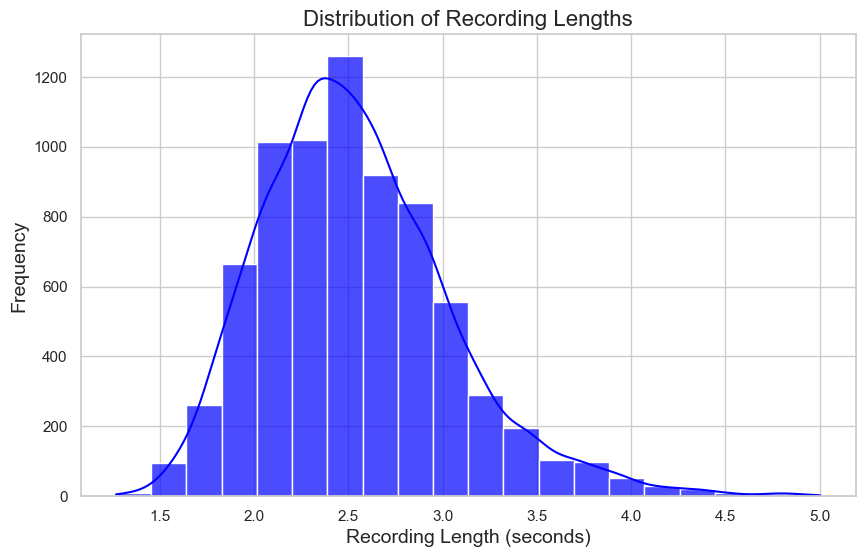

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(merged_df['duration_sec'], kde=True, bins=20, color="blue", alpha=0.7)

plt.title("Distribution of Recording Lengths", fontsize=16)
plt.xlabel("Recording Length (seconds)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


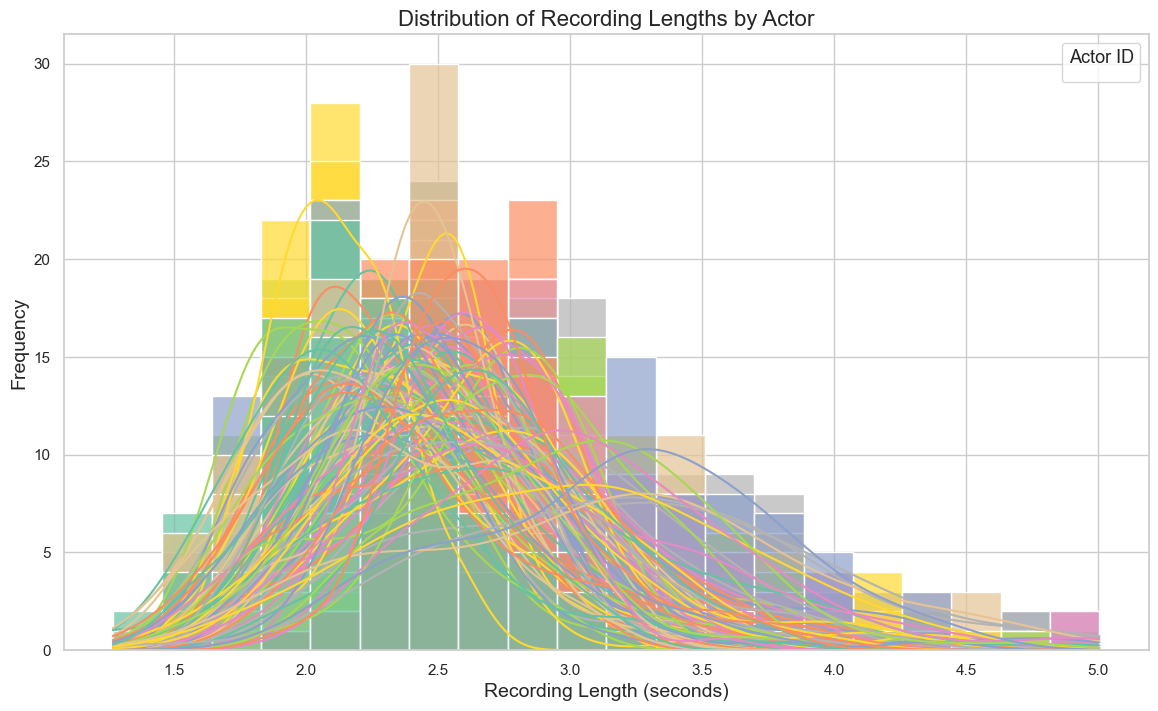

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

sns.histplot(
    data=merged_df,
    x="duration_sec",
    hue="ActorID",
    bins=20,
    kde=True,
    palette="Set2",
    alpha=0.7
)

plt.title("Distribution of Recording Lengths by Actor", fontsize=16)
plt.xlabel("Recording Length (seconds)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.legend(title="Actor ID", fontsize=12, title_fontsize=13)
plt.show()


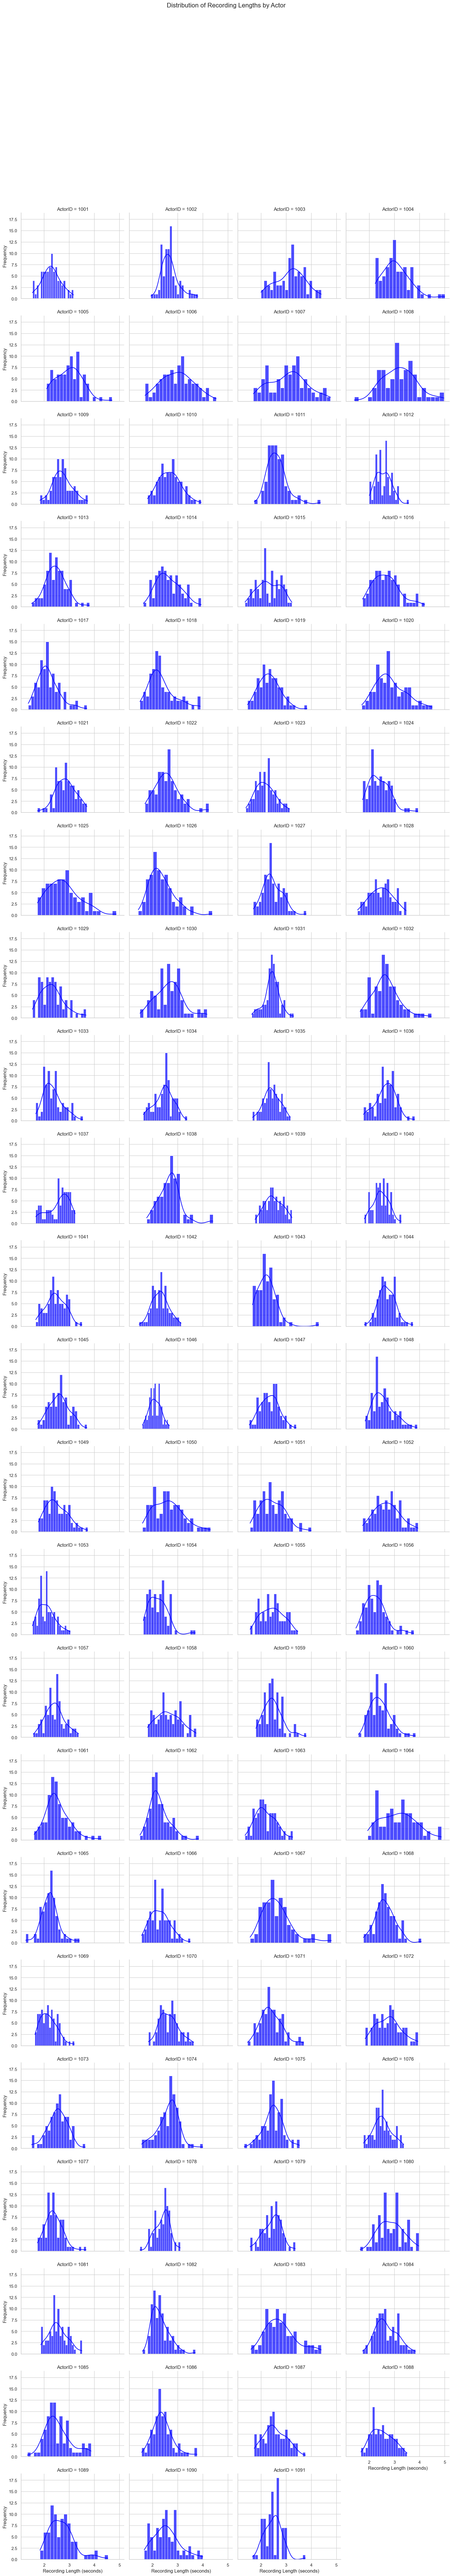

In [12]:
g = sns.FacetGrid(merged_df, col="ActorID", col_wrap=4, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "duration_sec", kde=True, bins=20, color="blue", alpha=0.7)
g.set_axis_labels("Recording Length (seconds)", "Frequency")
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle("Distribution of Recording Lengths by Actor", fontsize=16)
plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_38532\1435999557.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


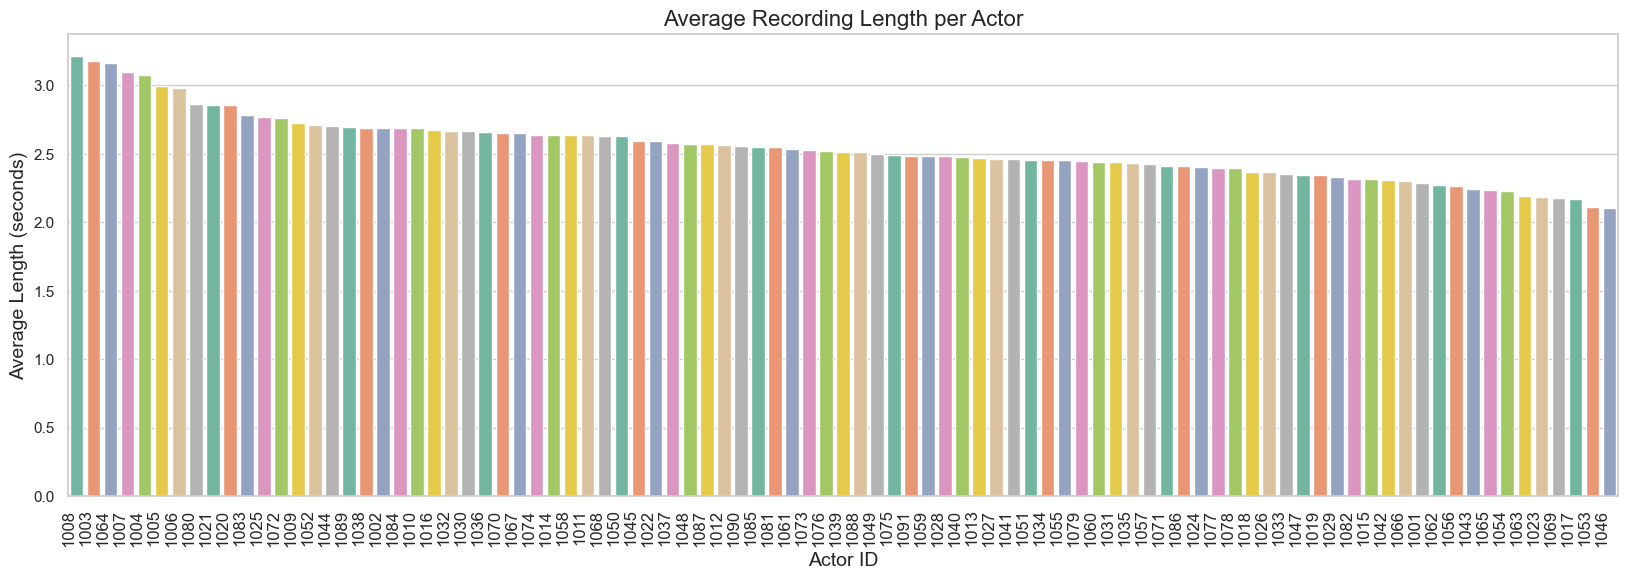

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

average_lengths = merged_df.groupby('ActorID')['duration_sec'].mean().reset_index()

average_lengths = average_lengths.sort_values(by='duration_sec', ascending=False)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(20, 6))
sns.barplot(
    data=average_lengths,
    x='ActorID',
    y='duration_sec',
    palette="Set2",
    order=average_lengths['ActorID']  # Use sorted ActorID values
)

plt.title("Average Recording Length per Actor", fontsize=16)
plt.xlabel("Actor ID", fontsize=14)
plt.ylabel("Average Length (seconds)", fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)  # Rotate and align right


plt.show()


C:\Users\kajet\AppData\Local\Temp\ipykernel_38532\550654023.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


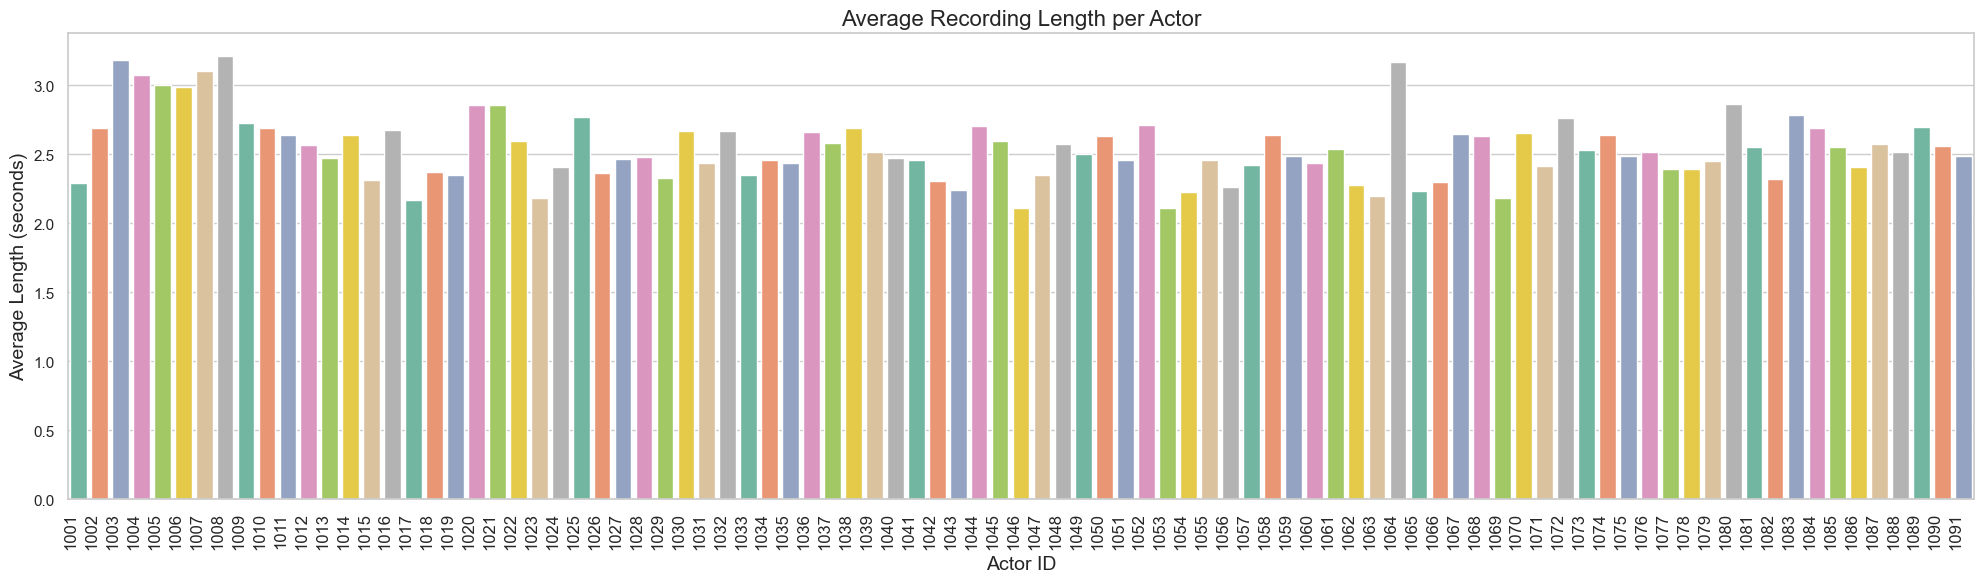

In [39]:
average_lengths = average_lengths.sort_values(by='ActorID', ascending=True)

plt.figure(figsize=(20, 6))
sns.barplot(
    data=average_lengths,
    x='ActorID',
    y='duration_sec',
    palette="Set2"
)

plt.title("Average Recording Length per Actor", fontsize=16)
plt.xlabel("Actor ID", fontsize=14)
plt.ylabel("Average Length (seconds)", fontsize=14)

plt.xticks(rotation=90, ha='right', fontsize=12) 

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


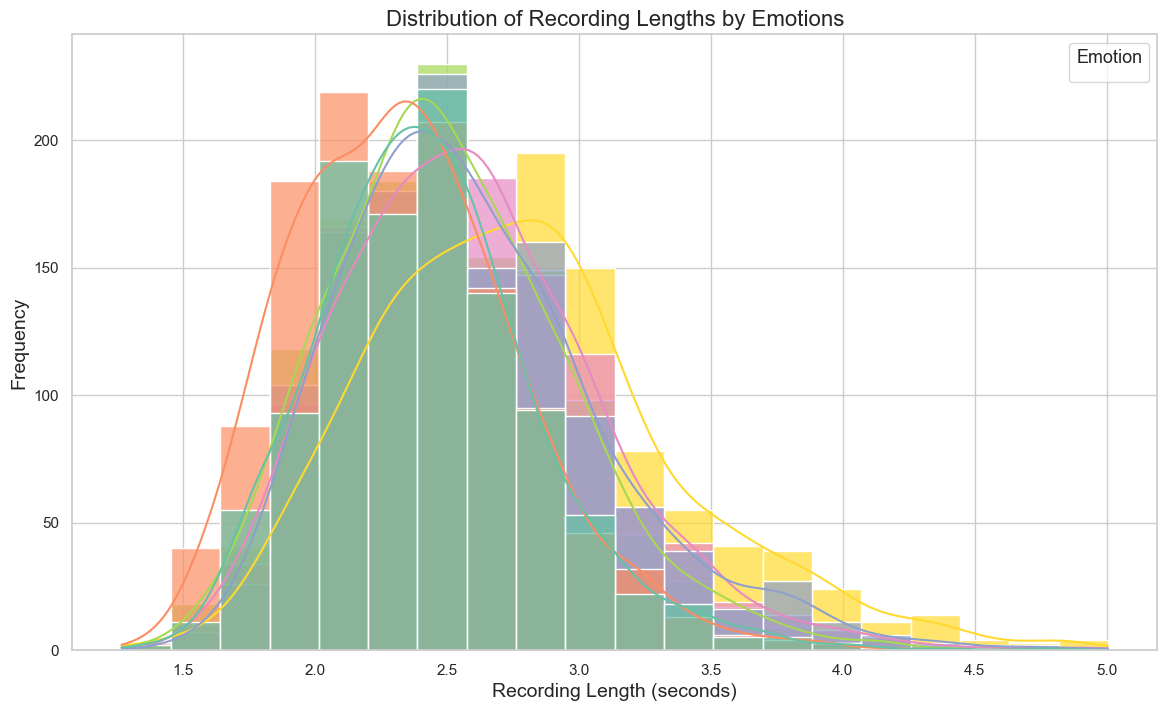

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

sns.histplot(
    data=merged_df,
    x="duration_sec",
    hue="Emotion",
    bins=20,
    kde=True,
    palette="Set2",
    alpha=0.7
)

plt.title("Distribution of Recording Lengths by Emotions", fontsize=16)
plt.xlabel("Recording Length (seconds)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.legend(title="Emotion", fontsize=12, title_fontsize=13)
plt.show()

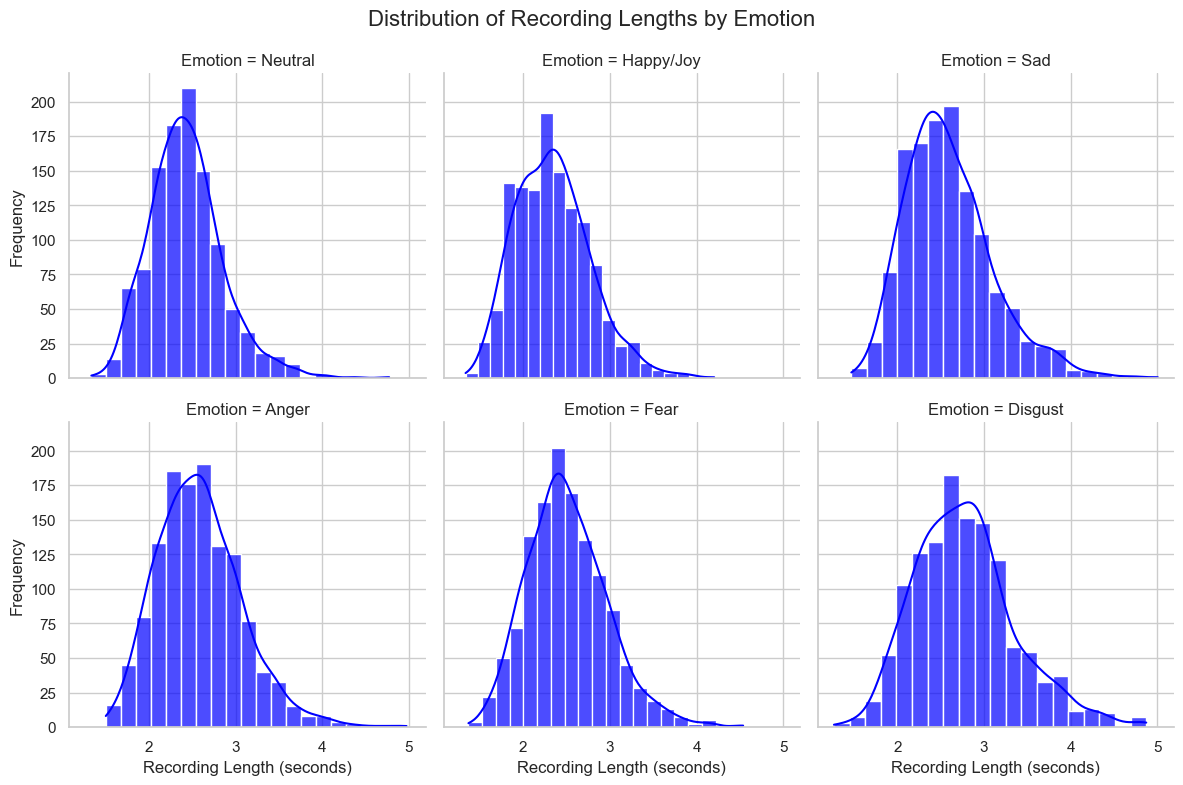

In [18]:
g = sns.FacetGrid(merged_df, col="Emotion", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "duration_sec", kde=True, bins=20, color="blue", alpha=0.7)
g.set_axis_labels("Recording Length (seconds)", "Frequency")
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle("Distribution of Recording Lengths by Emotion", fontsize=16)
plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_38532\1704277846.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


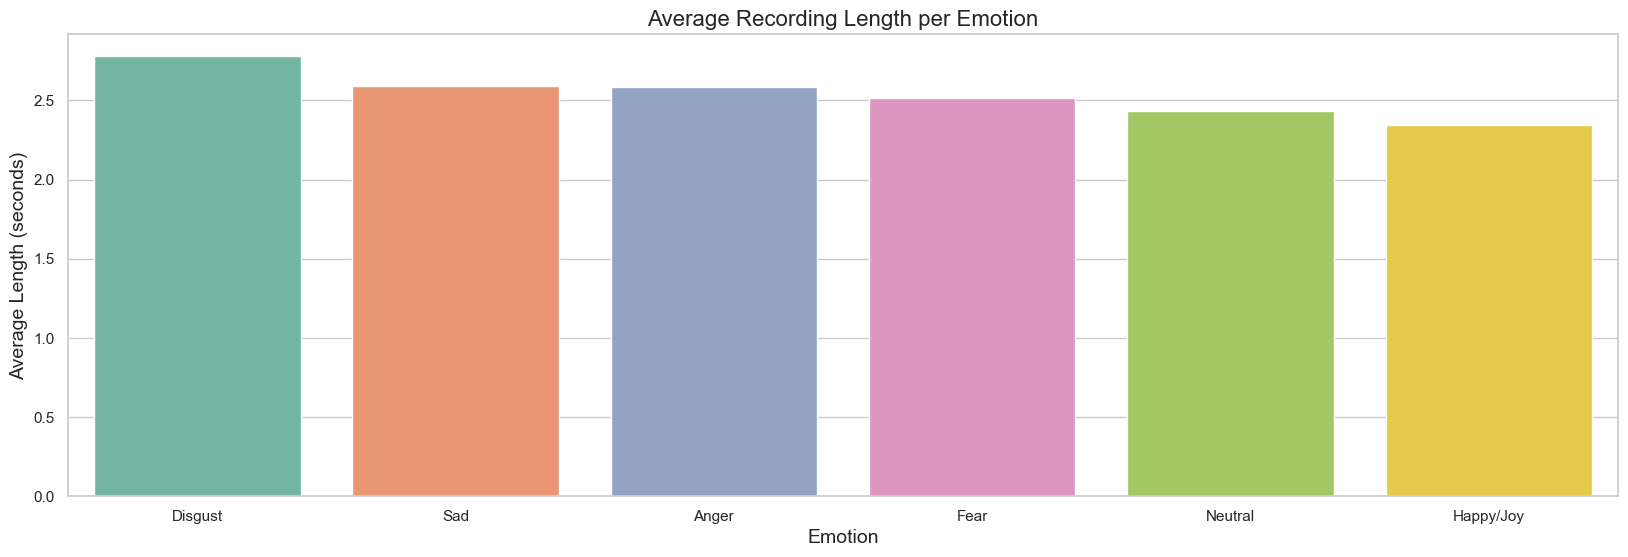

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

average_lengths = merged_df.groupby('Emotion')['duration_sec'].mean().reset_index()

average_lengths = average_lengths.sort_values(by='duration_sec', ascending=False)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(20, 6))
sns.barplot(
    data=average_lengths,
    x='Emotion',
    y='duration_sec',
    palette="Set2"
)

plt.title("Average Recording Length per Emotion", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Average Length (seconds)", fontsize=14)

plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_38532\1287525197.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


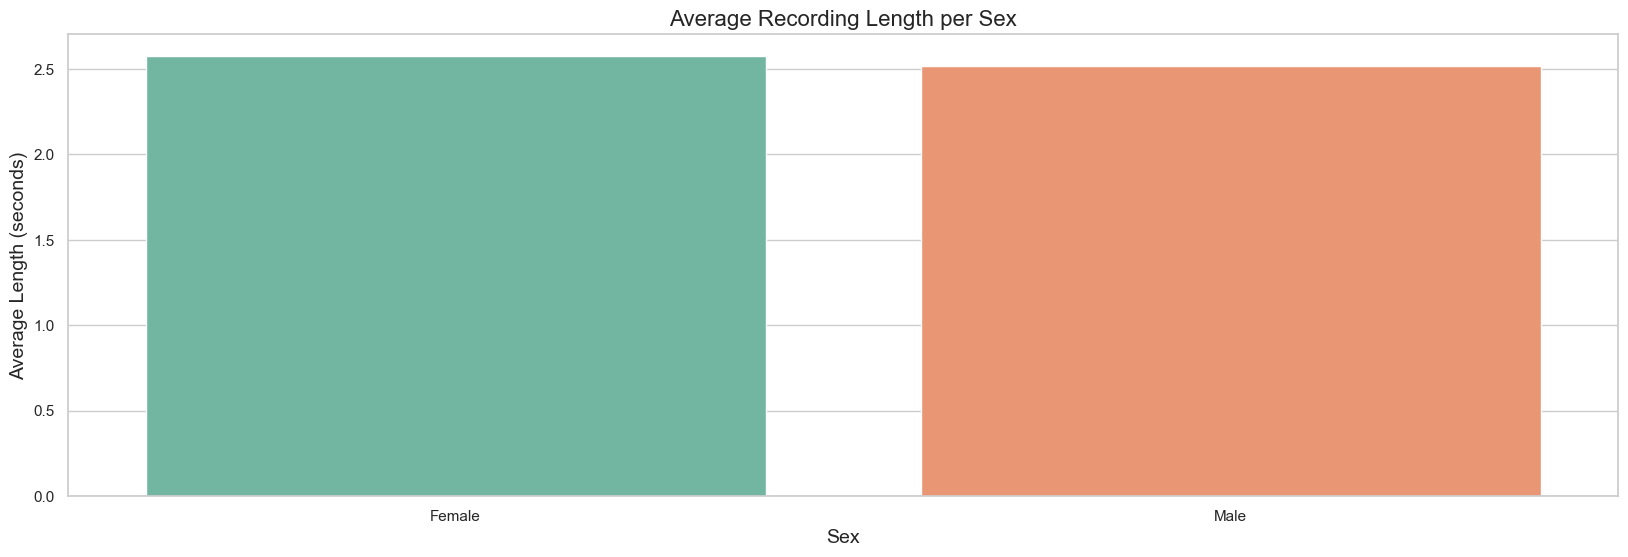

In [29]:
average_lengths = merged_df.groupby('Sex')['duration_sec'].mean().reset_index()

average_lengths = average_lengths.sort_values(by='duration_sec', ascending=False)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(20, 6))
sns.barplot(
    data=average_lengths,
    x='Sex',
    y='duration_sec',
    palette="Set2"
)

plt.title("Average Recording Length per Sex", fontsize=16)
plt.xlabel("Sex", fontsize=14)
plt.ylabel("Average Length (seconds)", fontsize=14)

plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_38532\667737823.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


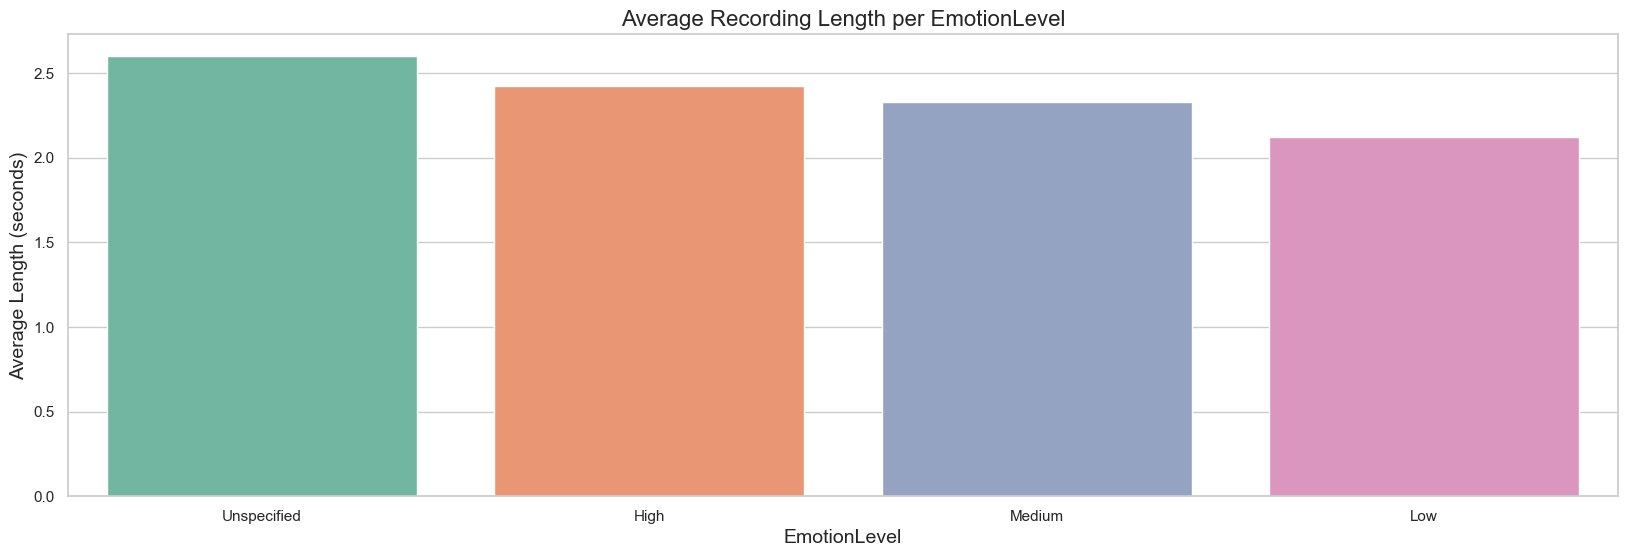

In [40]:
average_lengths = merged_df.groupby('EmotionLevel')['duration_sec'].mean().reset_index()

average_lengths = average_lengths.sort_values(by='duration_sec', ascending=False)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(20, 6))
sns.barplot(
    data=average_lengths,
    x='EmotionLevel',
    y='duration_sec',
    palette="Set2"
)

plt.title("Average Recording Length per EmotionLevel", fontsize=16)
plt.xlabel("EmotionLevel", fontsize=14)
plt.ylabel("Average Length (seconds)", fontsize=14)

plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_38532\1801600953.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


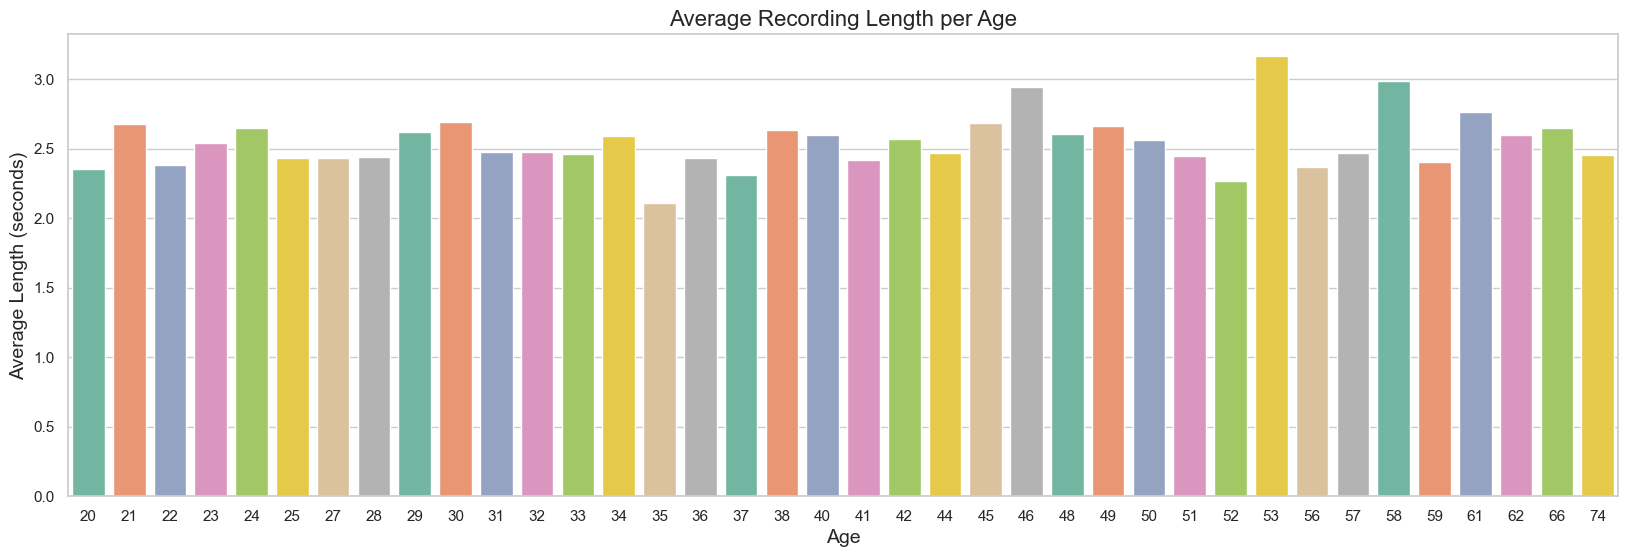

In [30]:
average_lengths = merged_df.groupby('Age')['duration_sec'].mean().reset_index()

average_lengths = average_lengths.sort_values(by='duration_sec', ascending=False)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(20, 6))
sns.barplot(
    data=average_lengths,
    x='Age',
    y='duration_sec',
    palette="Set2"
)

plt.title("Average Recording Length per Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Average Length (seconds)", fontsize=14)

plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_38532\246876102.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


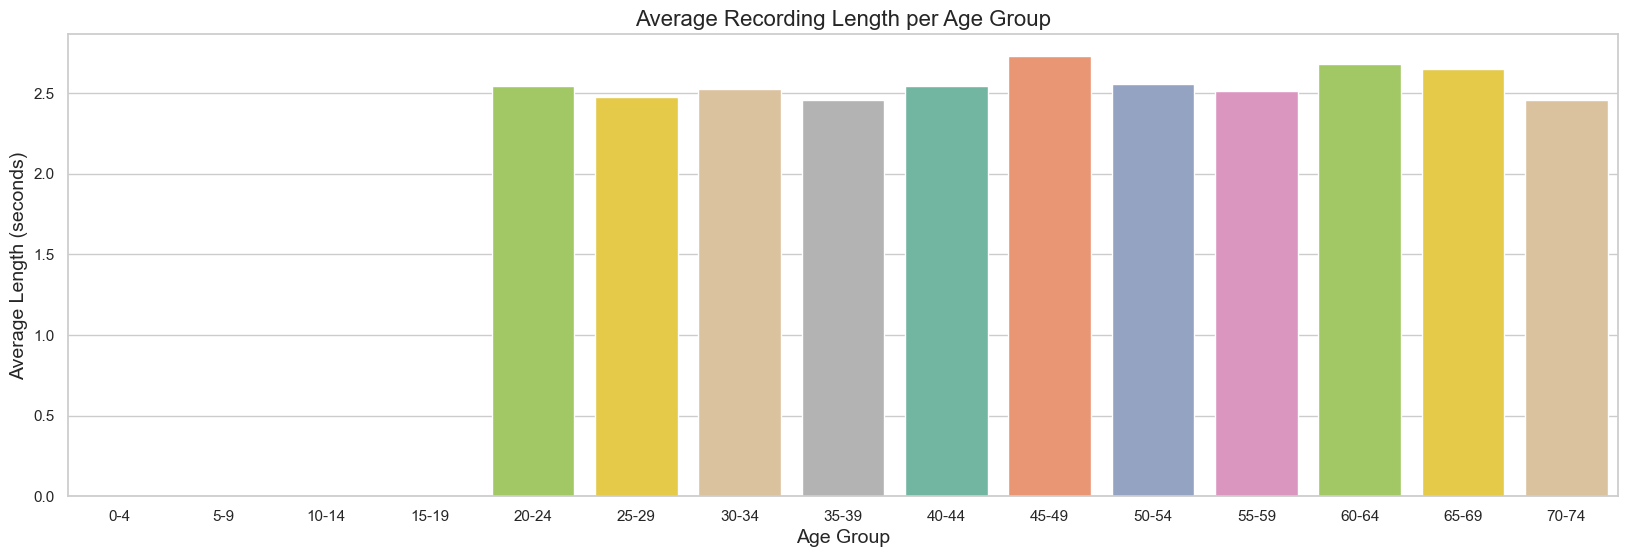

In [33]:
merged_df['AgeGroup'] = pd.cut(
    merged_df['Age'], 
    bins=range(0, merged_df['Age'].max() + 5, 5),  # Define bins with 5-year intervals
    right=False,  # Make intervals left-inclusive: [0, 5), [5, 10), etc.
    labels=[f"{i}-{i+4}" for i in range(0, merged_df['Age'].max(), 5)]  # Label bins
)

# Group by AgeGroup and calculate mean duration
average_lengths = merged_df.groupby('AgeGroup')['duration_sec'].mean().reset_index()

# Filter out rows where average duration is 0
average_lengths = average_lengths[average_lengths['duration_sec'] > 0.1]

# Sort by duration
average_lengths = average_lengths.sort_values(by='duration_sec', ascending=False)

# Plot using Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(
    data=average_lengths,
    x='AgeGroup',
    y='duration_sec',
    palette="Set2"
)

# Add titles and labels
plt.title("Average Recording Length per Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Average Length (seconds)", fontsize=14)

# Show the plot
plt.show()

Porownanie dlugosci audio i wideo

In [20]:
from moviepy import VideoFileClip

In [21]:
def get_video_duration(file_path):
    try:
        with VideoFileClip(file_path) as video:
            return video.duration
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

In [22]:
merged_df['filename_flv'] = merged_df['Filename'].apply(lambda x: f"{x}.flv" if not x.endswith('.flv') else x)

merged_df['video_file_path'] = merged_df['filename_flv'].apply(lambda x: os.path.join('data/video_data/', x))

merged_df['video_duration_sec'] = merged_df['video_file_path'].apply(get_video_duration)

merged_df = merged_df.drop(columns=['video_file_path'])


In [23]:
merged_df = merged_df.drop(columns=['filename_flv'])

In [24]:
merged_df

,Filename,Sentence,Emotion,EmotionLevel,ActorID,Age,Sex,Race,Ethnicity,duration_sec,video_duration_sec
0,1001_IEO_NEU_XX,It's eleven o'clock,Neutral,Unspecified,1001,51,Male,Caucasian,Not Hispanic,1.601625,1.60
1,1001_IEO_HAP_LO,It's eleven o'clock,Happy/Joy,Low,1001,51,Male,Caucasian,Not Hispanic,1.701688,1.70
2,1001_IEO_HAP_MD,It's eleven o'clock,Happy/Joy,Medium,1001,51,Male,Caucasian,Not Hispanic,1.668313,1.67
3,1001_IEO_HAP_HI,It's eleven o'clock,Happy/Joy,High,1001,51,Male,Caucasian,Not Hispanic,1.768438,1.77
4,1001_IEO_SAD_LO,It's eleven o'clock,Sad,Low,1001,51,Male,Caucasian,Not Hispanic,1.901875,1.90
...,...,...,...,...,...,...,...,...,...,...,...
7437,1091_WSI_HAP_XX,We'll stop in a couple of minutes,Happy/Joy,Unspecified,1091,29,Female,Asian,Not Hispanic,2.168813,2.17
7438,1091_WSI_SAD_XX,We'll stop in a couple of minutes,Sad,Unspecified,1091,29,Female,Asian,Not Hispanic,2.502500,2.50
7439,1091_WSI_ANG_XX,We'll stop in a couple of minutes,Anger,Unspecified,1091,29,Female,Asian,Not Hispanic,2.669313,2.67
7440,1091_WSI_FEA_XX,We'll stop in a couple of minutes,Fear,Unspecified,1091,29,Female,Asian,Not Hispanic,2.502500,2.50


In [25]:
merged_df['duration_difference'] = merged_df['video_duration_sec'] - merged_df['duration_sec']
merged_df['duration_difference_abs'] = abs(merged_df['video_duration_sec'] - merged_df['duration_sec'])

merged_df

,Filename,Sentence,Emotion,EmotionLevel,ActorID,Age,Sex,Race,Ethnicity,duration_sec,video_duration_sec,duration_difference,duration_difference_abs
0,1001_IEO_NEU_XX,It's eleven o'clock,Neutral,Unspecified,1001,51,Male,Caucasian,Not Hispanic,1.601625,1.60,-0.001625,0.001625
1,1001_IEO_HAP_LO,It's eleven o'clock,Happy/Joy,Low,1001,51,Male,Caucasian,Not Hispanic,1.701688,1.70,-0.001688,0.001688
2,1001_IEO_HAP_MD,It's eleven o'clock,Happy/Joy,Medium,1001,51,Male,Caucasian,Not Hispanic,1.668313,1.67,0.001687,0.001687
3,1001_IEO_HAP_HI,It's eleven o'clock,Happy/Joy,High,1001,51,Male,Caucasian,Not Hispanic,1.768438,1.77,0.001562,0.001562
4,1001_IEO_SAD_LO,It's eleven o'clock,Sad,Low,1001,51,Male,Caucasian,Not Hispanic,1.901875,1.90,-0.001875,0.001875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,1091_WSI_HAP_XX,We'll stop in a couple of minutes,Happy/Joy,Unspecified,1091,29,Female,Asian,Not Hispanic,2.168813,2.17,0.001187,0.001187
7438,1091_WSI_SAD_XX,We'll stop in a couple of minutes,Sad,Unspecified,1091,29,Female,Asian,Not Hispanic,2.502500,2.50,-0.002500,0.002500
7439,1091_WSI_ANG_XX,We'll stop in a couple of minutes,Anger,Unspecified,1091,29,Female,Asian,Not Hispanic,2.669313,2.67,0.000687,0.000687
7440,1091_WSI_FEA_XX,We'll stop in a couple of minutes,Fear,Unspecified,1091,29,Female,Asian,Not Hispanic,2.502500,2.50,-0.002500,0.002500


In [26]:
max(merged_df['duration_difference_abs'])

57.655874999999995

In [55]:
sorted_comparison_df = merged_df.sort_values(by='duration_difference', ascending=False)
sorted_comparison_df

,Filename,Sentence,Emotion,EmotionLevel,ActorID,Age,Sex,Race,Ethnicity,duration_sec,video_duration_sec,duration_difference,duration_difference_abs
5161,1064_IEO_DIS_MD,It's eleven o'clock,Disgust,Medium,1064,53,Male,Caucasian,Not Hispanic,4.104125,61.76,57.655875,57.655875
3757,1047_IEO_SAD_LO,It's eleven o'clock,Sad,Low,1047,22,Female,Unknown,Hispanic,1.901875,5.64,3.738125,3.738125
4068,1050_ITS_DIS_XX,I think I've seen this before,Disgust,Unspecified,1050,62,Male,African American,Not Hispanic,3.332750,4.44,1.107250,1.107250
1642,1021_TIE_DIS_XX,That is exactly what happened,Disgust,Unspecified,1021,30,Female,Caucasian,Not Hispanic,3.332750,4.44,1.107250,1.107250
5817,1072_IEO_DIS_MD,It's eleven o'clock,Disgust,Medium,1072,33,Female,Asian,Not Hispanic,3.332750,4.44,1.107250,1.107250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,1035_IEO_DIS_HI,It's eleven o'clock,Disgust,High,1035,48,Male,Caucasian,Not Hispanic,2.802812,2.44,-0.362812,0.362812
2783,1035_IEO_DIS_MD,It's eleven o'clock,Disgust,Medium,1035,48,Male,Caucasian,Not Hispanic,2.435750,1.97,-0.465750,0.465750
4662,1058_IEO_ANG_LO,It's eleven o'clock,Anger,Low,1058,36,Female,Caucasian,Not Hispanic,2.168813,1.57,-0.598812,0.598812
6171,1076_MTI_NEU_XX,Maybe tomorrow it will be cold,Neutral,Unspecified,1076,25,Female,Caucasian,Not Hispanic,2.389312,0.07,-2.319313,2.319313


C:\Users\kajet\AppData\Local\Temp\ipykernel_21700\1872795090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


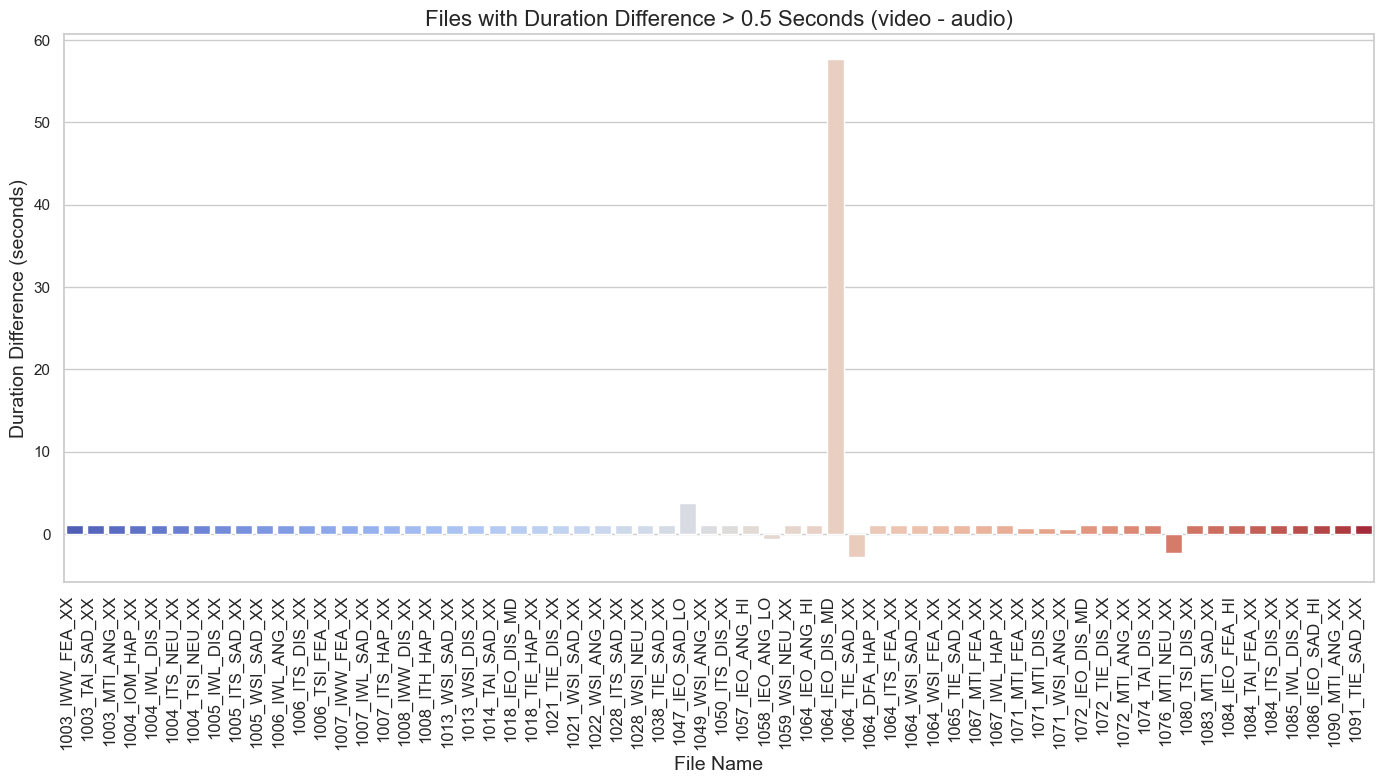

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_comparison_df = merged_df[merged_df['duration_difference_abs'] > 0.5]

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(
    data=filtered_comparison_df,
    x='Filename',
    y='duration_difference',
    palette="coolwarm"
)

plt.title("Files with Duration Difference > 0.5 Seconds (video - audio)", fontsize=16)
plt.xlabel("File Name", fontsize=14)
plt.ylabel("Duration Difference (seconds)", fontsize=14)

plt.xticks(rotation=90, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_21700\4293436971.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


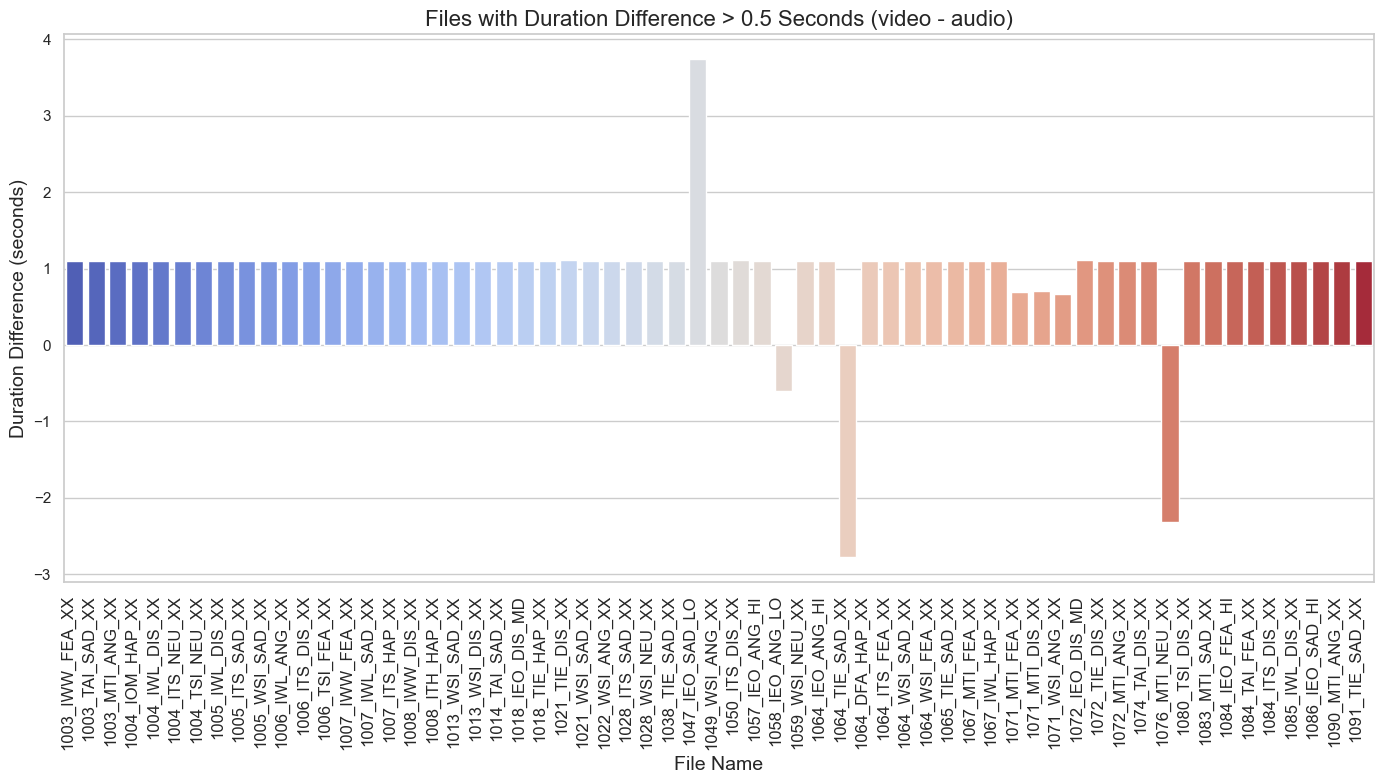

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_comparison_df = merged_df[merged_df['duration_difference_abs'] > 0.5]
filtered_comparison_df = filtered_comparison_df[filtered_comparison_df['duration_difference_abs'] < 57]

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(
    data=filtered_comparison_df,
    x='Filename',
    y='duration_difference',
    palette="coolwarm"
)

plt.title("Files with Duration Difference > 0.5 Seconds (video - audio)", fontsize=16)
plt.xlabel("File Name", fontsize=14)
plt.ylabel("Duration Difference (seconds)", fontsize=14)

plt.xticks(rotation=90, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_38532\2959255427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


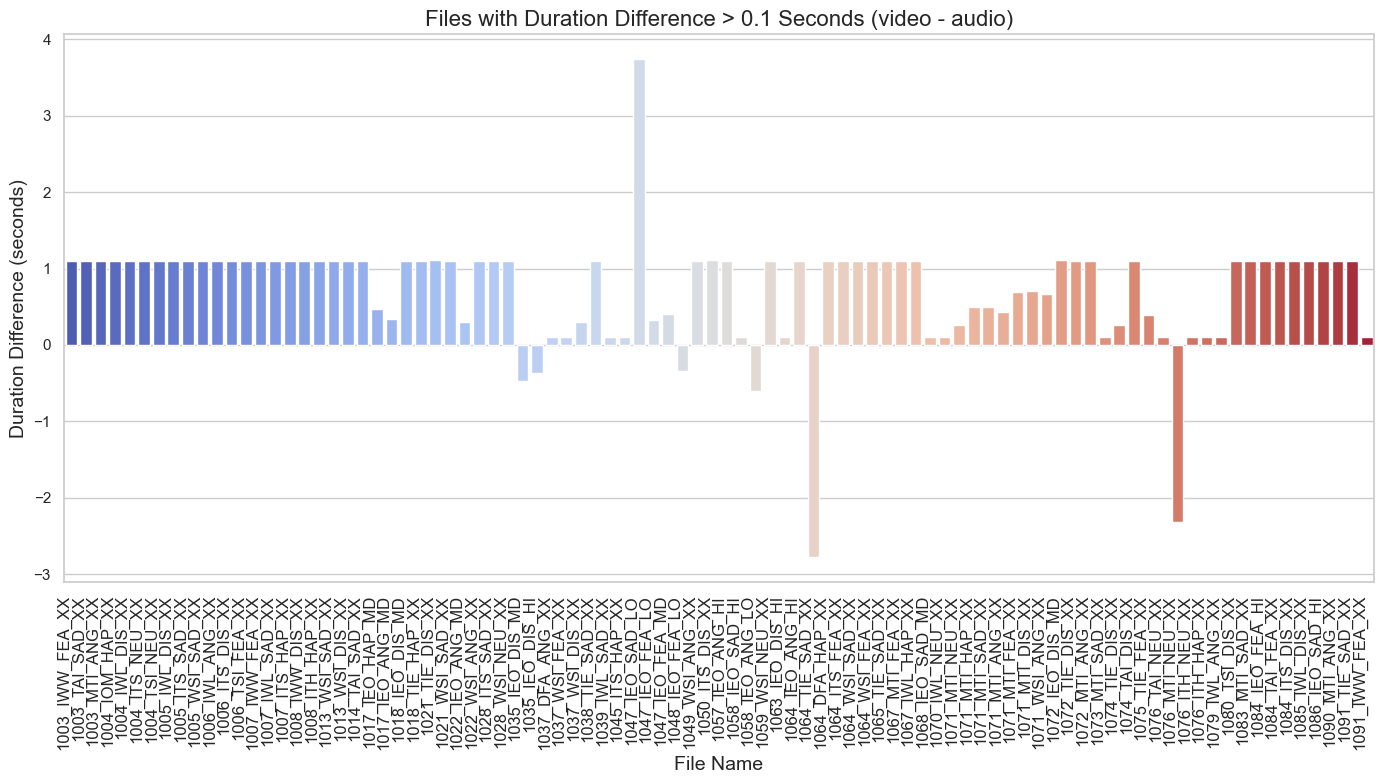

In [34]:
filtered_comparison_df = merged_df[merged_df['duration_difference_abs'] > 0.1]
filtered_comparison_df = filtered_comparison_df[filtered_comparison_df['duration_difference_abs'] < 57]

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(
    data=filtered_comparison_df,
    x='Filename',
    y='duration_difference',
    palette="coolwarm"
)

plt.title("Files with Duration Difference > 0.1 Seconds (video - audio)", fontsize=16)
plt.xlabel("File Name", fontsize=14)
plt.ylabel("Duration Difference (seconds)", fontsize=14)

plt.xticks(rotation=90, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

In [36]:
merged_df

,Filename,Sentence,Emotion,EmotionLevel,ActorID,Age,Sex,Race,Ethnicity,duration_sec,video_duration_sec,duration_difference,duration_difference_abs,AgeGroup
0,1001_IEO_NEU_XX,It's eleven o'clock,Neutral,Unspecified,1001,51,Male,Caucasian,Not Hispanic,1.601625,1.60,-0.001625,0.001625,50-54
1,1001_IEO_HAP_LO,It's eleven o'clock,Happy/Joy,Low,1001,51,Male,Caucasian,Not Hispanic,1.701688,1.70,-0.001688,0.001688,50-54
2,1001_IEO_HAP_MD,It's eleven o'clock,Happy/Joy,Medium,1001,51,Male,Caucasian,Not Hispanic,1.668313,1.67,0.001687,0.001687,50-54
3,1001_IEO_HAP_HI,It's eleven o'clock,Happy/Joy,High,1001,51,Male,Caucasian,Not Hispanic,1.768438,1.77,0.001562,0.001562,50-54
4,1001_IEO_SAD_LO,It's eleven o'clock,Sad,Low,1001,51,Male,Caucasian,Not Hispanic,1.901875,1.90,-0.001875,0.001875,50-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,1091_WSI_HAP_XX,We'll stop in a couple of minutes,Happy/Joy,Unspecified,1091,29,Female,Asian,Not Hispanic,2.168813,2.17,0.001187,0.001187,25-29
7438,1091_WSI_SAD_XX,We'll stop in a couple of minutes,Sad,Unspecified,1091,29,Female,Asian,Not Hispanic,2.502500,2.50,-0.002500,0.002500,25-29
7439,1091_WSI_ANG_XX,We'll stop in a couple of minutes,Anger,Unspecified,1091,29,Female,Asian,Not Hispanic,2.669313,2.67,0.000687,0.000687,25-29
7440,1091_WSI_FEA_XX,We'll stop in a couple of minutes,Fear,Unspecified,1091,29,Female,Asian,Not Hispanic,2.502500,2.50,-0.002500,0.002500,25-29
